**深層学習day1**


**Section1：入力層～中間層**

入力層には説明変数xが入る。

中間層には、入力層から与えられた値をもとに、次の層へ情報を伝播する。

中間層は複数あっても構わない。

中間層の計算は、入力xに対して、重みwをかけてバイアスを足し合わせて求める。

f(x)=wx+b







**■実装演習結果■**

4つの入力層から、３つの中間層への出力を実装。

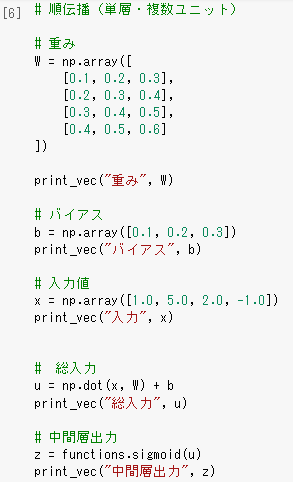

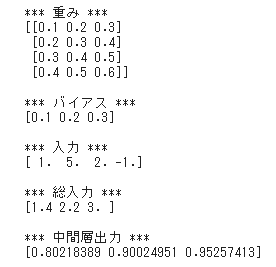



中間層に出力時にシグモイド関数を使用して、０～１までの間で表現している。

**■確認テスト■**

①ディープラーニングは、結局何をしようとしているのか？

→人間の脳ににた、ニューラルネットワークを用いて、入力した値からゴールである出力値を求めるモデルを構築すること。

②ニューラルネットワークの度の値の最適化が最終目的か？

→重みとバイアス

③入力層：２ノード１層、中間層３ノード２層、１ノード１層　を図表現

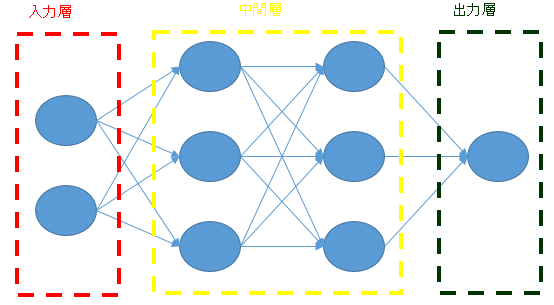


**Section2：活性化関数**

ニューラルネットワークにおいて、次の層への出力の大きさを決める非線形の関数。

入力値の値によって、次の層への信号ON/OFFや強弱を定める働きを持つ。

★中間層の活性化関数

　　ReLU関数・シグモイド（ロジスティック）関数・ステップ関数

★出力層用の活性化関数

　　ソフトマックス関数・恒等写像・シグモイド（ロジスティック）関数


■確認テスト■

①配布コード内の該当箇所抜き出し

→Z1＝function.sigmoid(u)

実際は、上記はメソッドで以下の計算を実施している


In [ ]:
# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

**Section3：出力層**

ニューラルネットワークにおいて答えが出力する層。

実際入力に対する答えを用意して、出力層で求めた値を比較して

その結果を再度バイアス等の重みを調整して学んでいく。

中間層との違いは、中間層は活性化関数を用いて出力値に強弱をつけるが、
出力層は、強弱をつけることはしない。

ただし分類問題のときは、０～１の値となるように調整を行う。







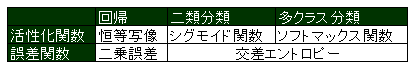

**■実装演習結果■**





In [ ]:
#ソフトマックス関数
def softmax(x):
   if x.ndim == 2:#2次元だった場合
     x = x.Tx
     x = x-np.max(x, axis=0)
     y = np.exp(x) /np.sum(np.exp(x), axis=0)
      return y.T
 x = x -np.max(x) # オーバーフロー対策
      return np.exp(x) / np.sum(np.exp(x)) 

In [ ]:
#交差エントロピー誤差
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
    # one-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size

■確認テスト■

①引き算ではなく二乗する理由

 →正の値で差を表現したかったから

②1/2はどういう意味？

→微分しやすくして計算を簡略化する目的



**Section4：勾配降下法**

**勾配降下法**

深層学習の目的は、学習を通して誤差を最小にするネットワークを作成する

→誤差を最小化するパラメータを発見する

→パラメータを最適化するために、勾配降下法を用いる


　　**w(t+1)=w(t)−ϵ∇E**

ニューラルネットワークの出力層から取得した値と答えとなるデータとの誤差関数を取得し

より小さくなるように、重みとバイアスを更新して次の学習に反映する

**確立的勾配降下法**

　**w(t+1)=w(t)−ϵ∇En**

勾配降下法は全サンプルの平均誤差だが、

確立的勾配降下法ではランダムに抽出したサンプルの誤差として計算を行う


【メリット】

・データが冗長時のコスト削減

・望まない局所的最適解に収束するリスク軽減

・オンライン学習可能

【デメリット】

・外れ値に弱い


**ミニバッチ勾配降下法**

ランダムに分割したデータ集合（ミニバッチ）に属するサンプルの平均誤差

→確立的勾配降下法のメリットを損なわず、SIMD並列化

**■実装演習結果■**

In [ ]:
#勾配降下法（最急降下法）
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, params, grad):
        for key in params.keys():
            params[key] -= self.learning_rate * grad[key] 

■確認テスト■

①オンライン学習とはなにか？

→学習データがはいってくるたびにパラメータを更新する

　反対語は、バッチ学習で一度の全ての学習を使って、パラメータ更新を行う

②w(t+1)=w(t)−ϵ∇Et の数式の意味を図を説明

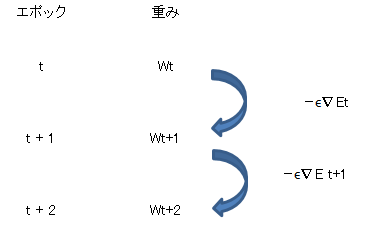



Section5：誤差逆伝播法

算出された誤差を、出力層側から順に微分し、前の層前の層へと伝播。

最小限の計算で各パラメータでの微分値を解析的に計算する方法。


確認テスト

①誤差逆伝播法では不要な再帰的処理を避けることができる。すでに行った計算結果を保持しているソースコードを抽出。

→ delta2 = functions.d_sigmoid_with_loss(d, y)

delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)


②次の式のコードを抽出

$$
\frac{∂E}{∂y}\frac{∂y}{∂u}
$$

→ delta2 = functions.d_mean_squared_error(d, y)









$$
\frac{∂E}{∂y}\frac{∂y}{∂u}\frac{∂u}{∂w^2}
$$

→ grad['W2'] = np.dot(z1.T, delta2)




**深層学習day2**

**Section1：勾配消失問題**

誤差逆伝播法が下位層に進んでいくにつれて、勾配が緩やかになっていく。

そのため、勾配降下法による更新では下位層のパラメータはほとんど変わらず、訓練が最適化しなくなる

→シグモイド関数（0～1の間を出力する）が原因

→大きな値で出力の変化が微小なため、引き起こす




活性化関数　ReLU関数（0以下は0、0以上はその値を返却）を使うことで解消を図る

ミニバッチ単位で入力値のデータの偏りを抑制する方法（バッチ正規化）で解消を図る


In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

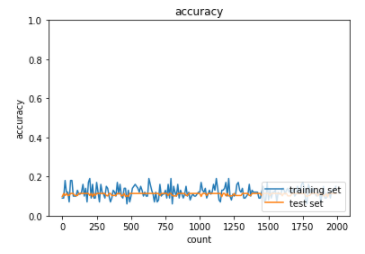

結果、回数が増えても学習されていないことがわかる。

つまり、勾配が消失している。


確認テスト

①連鎖律の原理を求めてdz/dxを求めよ。
$$
 ｚ＝ｔ^2  　→A
$$
$$
 ｔ = x + y　→B
$$

→
Aを微分すると
$$
\frac{dz}{dt} = 2t
$$
Bを微分すると
$$
\frac{dt}{dx} = 1
$$
連鎖律を使って求める
$$
\frac{dz}{dx} = \frac{dz}{dt}\frac{dt}{dx}　＝2t
$$



②シグモイド関数を微分したとき、入力値が0のときに最大値をとる

その値として正しいものを選択肢から選べ

□（1）0.15

☑（2）0.25

□（3）0.35

□（4）0.45


③重みの初期値に０を設定すると、どのような問題が発生するか

パラメータの更新を行っても０で固定されたままとなる

④一般的に考えられるバッチ正規化の効果を２つ挙げよ

→平均０、分散１を出力することにより、ネットワークが高速となる

入力データが学習の度に大きく変わることを防ぎ、中間層の学習の安定化


**Section2：学習率最適化手法**

学習率の値が大きい場合

→最適値にいつまでもたどりつかず発散してしまう

学習率の値が小さい場合

→発散することはないが、小さすぎると収束するまでに時間がかかってしまう、また局所最適値に収束しづらくなる


学習率最適化手法

◆モメンタム

　誤差をパラメータで微分したものと学習率の積を減算した後、現在の重みに前回の重みを減算した値と慣性の積を加算する

◆AdaGrad

誤差をパラメータで微分したものを再定義した学習率の積を減算する

◆RMSProp

誤差をパラメータで微分したものと再定義した学習率の積を減算する
　

◆Adam

モメンタムの過去の勾配の指数関数的減衰平均、RMSPropの過去の勾配の２乗の指数関数的減衰平均をとりこんだ最適化アルゴリズム
　

**実装結果確認**





In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.3
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

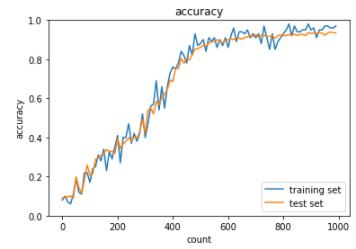

SGDでは、学習が進まなかったが、回数が増えれば増えるほど学習が進んでいることがわかる。

確認テスト

①モメンタム・AdaGrad・RMSPropの特徴を述べよ

モメンタム

→谷間についても最適値に行くまでの時間が速い

AdaGrad

→勾配の緩やかな斜面に対して、最適値に近づける

RMSProp

→ハイパーパラメータの調整が必要な場合が少ない


**Section3：過学習**

過学習とは、テスト誤差と訓練誤差とで学習曲線が乖離すること

ネットワークの自由度を制約する正規化を利用して過学習を抑制する

正規化手法には、L1正規化、L2正規化、ドロップアウトがある。

ドロップアウトは、ランダムにノードを削除して学習させること。メリットとして、データ量を変化させずに、異なるモデルを学習させていると解釈できる。

実装演習結果

L1正規化・L2正規化を実装した

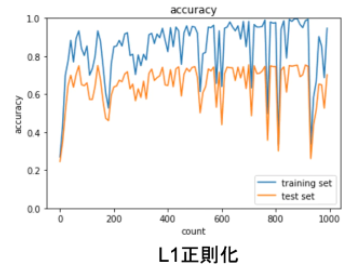

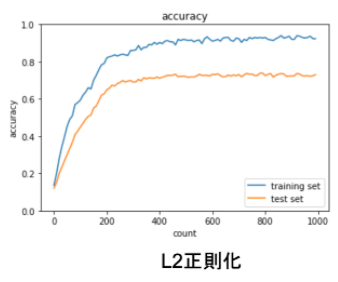

確認テスト

①以下の図でL1正規化はどっち？

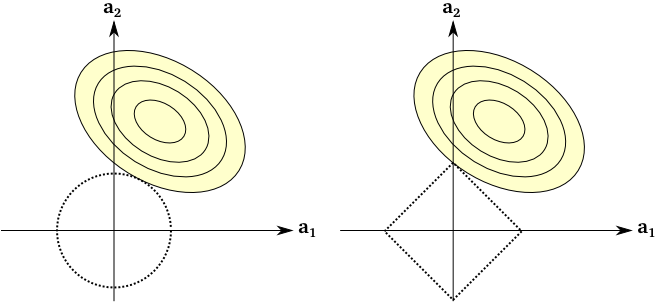

→右側



Section4：畳み込みニューラルネットワークの概念

畳み込み層の全体像

入力値　→　フィルター　→　出力値　＋　バイアス　→　活性化関数　→　出力値

３次元の空間情報も学習できるような層となっている。

全結合層

３次元データが１次元のデータとして処理される


実装結果

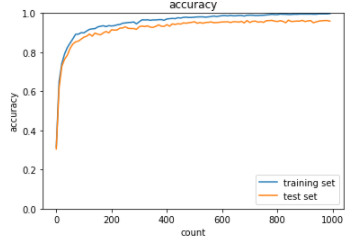


確認テスト

①サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。
→3×3

Section5：最新のCNN

AlexNet モデル

過学習を防ぐ施策

サイズに対して全結合層の出力にドロップアウトを使用

その層の中の最大値や平均の値を用いて次の層に引き渡しを行っている。
